In [1]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

### **_Function for plotting signals_**

In [6]:
def plot_signal(time, signal, title=None,xlabel=None, ylabel=None, style='seaborn-v0_8-pastel',color=None, label=None, loc = 'upper right'):
    
    plt.plot(time, signal, color= color, label=label)
    plt.grid(True)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.style.use(style)
    plt.legend(loc = loc)
    plt.show()

### **_signals functions part_**

In [3]:
# sign function
def sign(time):
    return np.where(time>=0,1,-1)

# Unit step function
def unite(time):
    return np.where(time>0,1,0)

# Ramp function
def ramp(time):
    return np.where(time>0, time,0)

# rectangular function
def porte(time):
    return np.where(np.abs(time)<0.5,1,0)

# Sinusoidal signal
def cosine_signal(amplitude, frequency,phase, time):
    return amplitude*np.cos(2*np.pi*frequency*time + phase)


# un triangle
def single_triangular_signal(amplitude, time):
    n = len(time)
    signal_array = np.zeros_like(time)
    signal_array[n//4:n//2] = amplitude*((2*time[n//4:n//2]/np.pi)+1)
    signal_array[n//2:3*n//4] = amplitude*((-2*time[n//2:3*n//4]/np.pi)+1)
    return signal_array


def time_array(start, finish, number_of_points):
    return np.linspace(start, finish, number_of_points)

# Carré
def square_signal(amplitude, time,number_of_squares):
    time_array_length = len(time)
    signal_array = np.zeros_like(time)
    step = int(time_array_length/number_of_squares)
    start =0
    for interval_rank in range(number_of_squares):
        if interval_rank % 2 == 0:
            signal_array[start:start+step] = amplitude
        start += step
    return signal_array

# Dent de scie
def sawtooth_signal(amplitude, time,number_saw_tooths):
    # compute one sawtooth
    signal_array = np.zeros_like(time)
    signal_array[0] = -1*amplitude
    # Discretisation of the time array in intervals
    interval_step = len(time)//number_saw_tooths
    time_step = time[interval_step]-time[0]
    signal_array[0:interval_step] = 2*amplitude*(time[0:interval_step]- time[0]-float(time_step)/2)/time_step
    start = interval_step
    for interval in range(1, number_saw_tooths):
        signal_array[start:start+interval_step] = signal_array[0:interval_step]
        start += interval_step
    return signal_array
    

## **signals sketching**

### **_Fonction signe_**

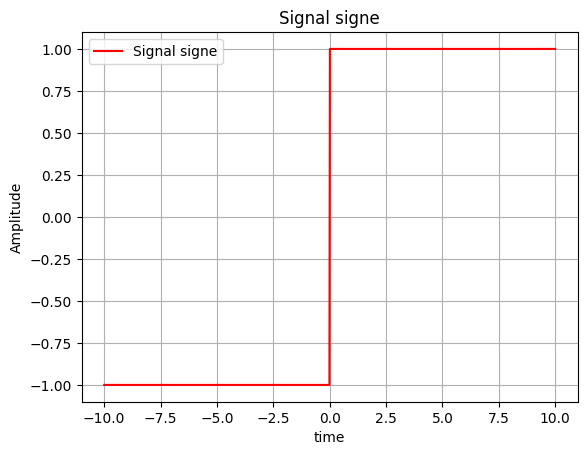

In [4]:
time = time_array(-10, 10, 1000)
signe_signal = sign(time)
style = 'seaborn-v0_8-pastel'
title = 'Signal signe'
xlabel = 'time'
ylabel = 'Amplitude'
label = 'Signal signe'
plot_signal(time, signe_signal, title,xlabel, ylabel, style,color = 'red', label = label)

### **_Sunusoidal signal_**

Exemple of system that generate sinusoidal signal:  Tuning Fork A-440

<img src="img/tuning_fork.png" width="600" height="400">


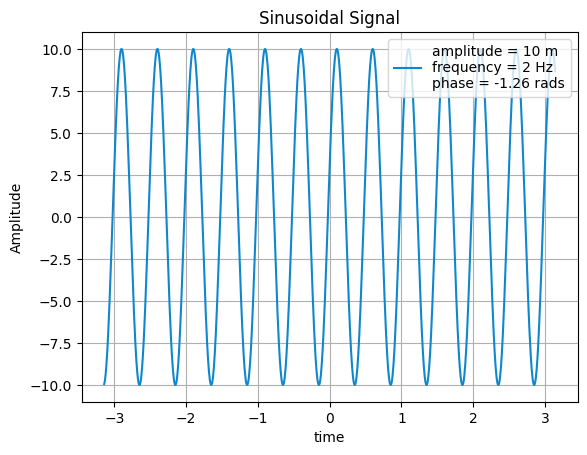

In [17]:
amplitude = 10
frequency = 2
phase = -0.4*np.pi
time = time_array(-np.pi, np.pi, 1000)
sinusoid = cosine_signal(amplitude, frequency, phase, time)
style = 'seaborn-v0_8-pastel'
title = 'Sinusoidal Signal'
xlabel = 'time'
ylabel = 'Amplitude'
label = f'amplitude = {amplitude} m\nfrequency = {frequency} Hz\nphase = {np.round(phase,2)} rads'
plot_signal(time, sinusoid, title, xlabel, ylabel, style, color='#0E87CC', label=label)    

In [171]:
amplitude = 1
time = time_array(-np.pi, np.pi, 1000)
number_saw_tooths = 10
sawtooth = sawtooth_signal(amplitude, time,number_saw_tooths)
sinusoid = cosine_signal(10, 2, -0.4*np.pi, time)

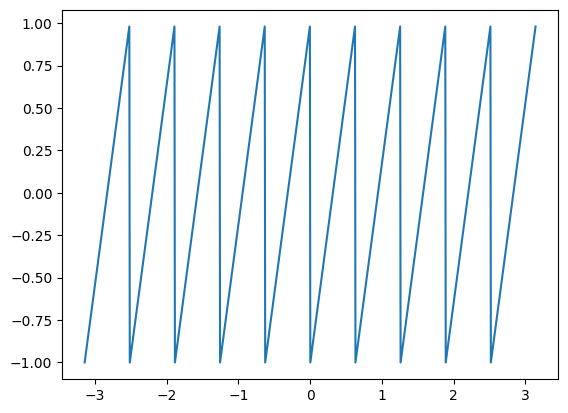

In [173]:
plt.plot(time,sawtooth)

In [174]:
#plt.plot(time,square)
len(time)/20

50.0